## Ejercicio de regresión lineal
### Daniel Espinosa

### Primera regresión

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("regLin.csv",header=0)
df.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

/Users/danielespinosa/gitsome/claseMachineLearning/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Conviene tratar todo en términos de matrices ya que en este trabajo no estaré utilizando las funciones de las DF de pandas

In [5]:
X_trainM = X_train.as_matrix()
Y_trainM = Y_train.as_matrix()

X_testM = X_test.as_matrix()
Y_testM = Y_test.as_matrix()

In [6]:
regressor = LinearRegression(copy_X = True, fit_intercept = True, n_jobs=1, normalize= False)

In [7]:
regressor.fit(X_trainM, Y_trainM)

/Users/danielespinosa/gitsome/claseMachineLearning/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y = regressor.predict(X_testM)

#### Esta gráfica es un scatter de los puntos que predice el modelo contra los puntos reales (contra los que no entrenó)

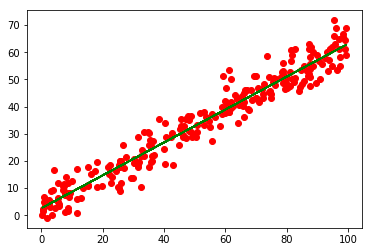

In [9]:
#plot del test contra la regresion que se predijo de train
plt.plot(X_test, Y_test, 'ro')
#plt.axis([0, 6, 0, 20])
plt.plot(X_test, y, 'g-')
plt.show()

Plottear la curva de error

In [10]:
#y

In [11]:
#Este es el coeficiente que minimiza la funcion de error cuadrado medio
regressor.coef_[0]

0.60608617222088335

In [12]:
#Fijamos el intercept a w0, este no lo variaremos por ahora.
w0 = regressor.intercept_
w0

2.562842534084794

Hacemos un sweep cambiando el coeficiente

In [13]:
w1arr = np.linspace(0,4,len(Y_trainM))
len(X_trainM)

771

In [14]:
#Funcion para calcular el MSE dependiendo de los parametros w0 y w1
def calculateError(X,Y,w0,w1):
    error = 0
    for i in range(0,len(Y)):
        yEst = w0 + (w1*X[i])
        error += ((yEst-Y[i])**2)

    error = error/len(Y)
    
    return error[0]

In [15]:
w1Error = []

for i in range(0,len(w1arr)):
    w1Error.append((calculateError(X_trainM,Y_trainM,w0,w1arr[i])))


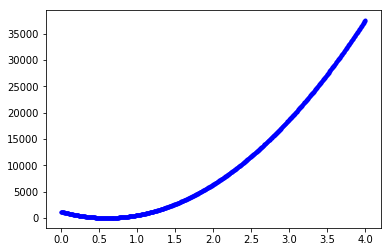

In [18]:
plt.plot(w1arr, w1Error, 'b.')
plt.show()

Podemos también calcular el error para el *intercept*. En este caso, fijemos w1 con el óptimo que la regresión de sklearn había calculado y cambiemos w0.

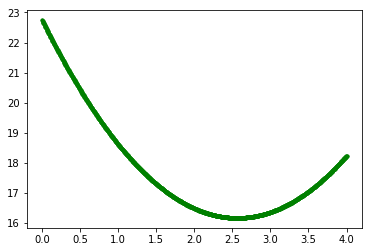

In [20]:
w1 = regressor.coef_[0]
w0arr = np.linspace(0,4,len(Y_trainM))

w0Error = []

for i in range(0,len(w0arr)):
    w0Error.append((calculateError(X_trainM,Y_trainM,w0arr[i],w1)))

    
plt.plot(w0arr, w0Error, 'g.')
plt.show()

Por supuesto que se puede hacer las dos optimizaciones al mismo tiempo (y esto es realmente lo que hace la biblioteca de sklearn o cualquier regresión lineal).

In [41]:
#Use less points so this doesn't take ages...

w0arr = np.linspace(0,4,30)
w1arr = np.linspace(0,4,30)

bothError = []
for i in range(0,len(w0arr)):
    bothError.append([])
    for j in range(0,len(w1arr)):
        bothError[i].append((calculateError(X_trainM,Y_trainM,w0arr[i],w1arr[j])))

Hacemos el plot.

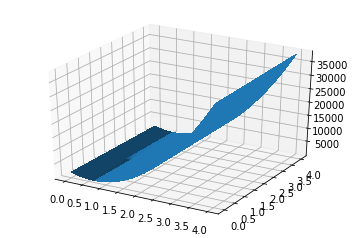

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(w0arr, w1arr)

ax.plot_surface(X, Y,bothError,rstride=1, cstride=1,linewidth=0, antialiased=False)
plt.show()

### Segunda regresión

In [3]:
df2 = pd.read_csv("regLin2.csv",header=0)
df2.describe()

,X,y
count,1029.000000,1029.000000
mean,50.757989,2137.739358
std,29.708336,1870.369352
min,0.230225,0.272241
25%,22.870956,342.135840
50%,53.951080,1774.199681
75%,76.256816,3658.103897
max,99.831593,7133.608688


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df2[df2.columns[0:-1]],df2[df2.columns[-1]], train_size=0.75)

/Users/danielespinosa/gitsome/claseMachineLearning/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Conviene tratar todo en términos de matrices ya que en este trabajo no estaré utilizando las funciones de las DF de pandas

In [5]:
X_trainM = X_train.as_matrix()
Y_trainM = Y_train.as_matrix()

X_testM = X_test.as_matrix()
Y_testM = Y_test.as_matrix()

In [6]:
regressor2 = LinearRegression(copy_X = True, fit_intercept = True, n_jobs=1, normalize= False)

In [7]:
regressor2.fit(X_trainM, Y_trainM)

/Users/danielespinosa/gitsome/claseMachineLearning/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y = regressor2.predict(X_testM)

#### Esta gráfica es un scatter de los puntos que predice el modelo contra los puntos reales (contra los que no entrenó)

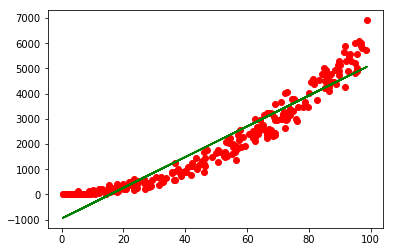

In [9]:
#plot del test contra la regresion que se predijo de train
plt.plot(X_test, Y_test, 'ro')
#plt.axis([0, 6, 0, 20])
plt.plot(X_test, y, 'g-')
plt.show()

Se puede observar que este conjunto de datos no tiene comportamento lineal.

In [11]:
#Este es el coeficiente que minimiza la funcion de error cuadrado medio
regressor2.coef_[0]

60.974866021807564

In [12]:
#Fijamos el intercept a w0, este no lo variaremos por ahora.
w0 = regressor2.intercept_
w0

-954.41301831236569

Hacemos un sweep cambiando el coeficiente

In [17]:
w1arr = np.linspace(40,80,len(Y_trainM))
len(X_trainM)

771

In [14]:
#Funcion para calcular el MSE dependiendo de los parametros w0 y w1
def calculateError(X,Y,w0,w1):
    error = 0
    for i in range(0,len(Y)):
        yEst = w0 + (w1*X[i])
        error += ((yEst-Y[i])**2)

    error = error/len(Y)
    
    return error[0]

In [18]:
w1Error = []

for i in range(0,len(w1arr)):
    w1Error.append((calculateError(X_trainM,Y_trainM,w0,w1arr[i])))


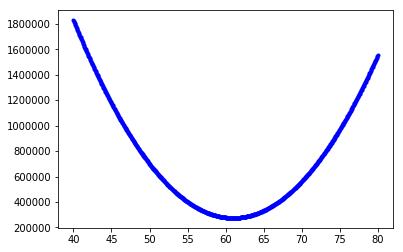

In [19]:
plt.plot(w1arr, w1Error, 'b.')
plt.show()

Podemos también calcular el error para el *intercept*. En este caso, fijemos w1 con el óptimo que la regresión de sklearn había calculado y cambiemos w0.

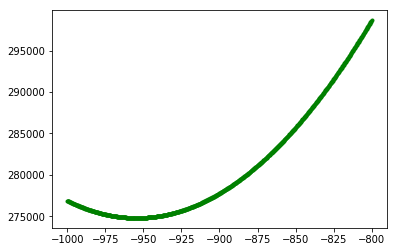

In [22]:
w1 = regressor2.coef_[0]
w0arr = np.linspace(-1000,-800,len(Y_trainM))

w0Error = []

for i in range(0,len(w0arr)):
    w0Error.append((calculateError(X_trainM,Y_trainM,w0arr[i],w1)))

    
plt.plot(w0arr, w0Error, 'g.')
plt.show()

Por supuesto que se puede hacer las dos optimizaciones al mismo tiempo (y esto es realmente lo que hace la biblioteca de sklearn o cualquier regresión lineal).

In [23]:
#Use less points so this doesn't take ages...

w0arr = np.linspace(-1000,-800,30)
w1arr = np.linspace(40,80,30)

bothError = []
for i in range(0,len(w0arr)):
    bothError.append([])
    for j in range(0,len(w1arr)):
        bothError[i].append((calculateError(X_trainM,Y_trainM,w0arr[i],w1arr[j])))

Hacemos el plot.

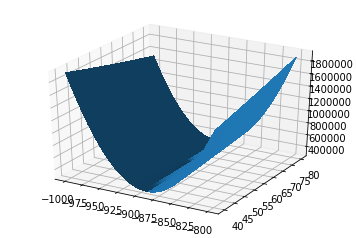

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(w0arr, w1arr)

ax.plot_surface(X, Y,bothError,rstride=1, cstride=1,linewidth=0, antialiased=False)
plt.show()

En esta gráfica es mucho mas claro que la funcion de error medio cuadrado, sin importar las dimensones, es convexa y por lo tanto siempre se puede llegar al mínimo global de manera no muy complicada.

Pudimos ver que los mínimos encontrados por las funciones de la librería sklearn son los correctos.

### Tercera regresión

In [25]:
df3 = pd.read_csv("regLin3.csv",header=0)
df3.describe()

,X,y
count,1029.000000,1029.000000
mean,50.163569,-0.024165
std,29.403168,0.701349
min,0.083795,-1.000000
25%,24.059073,-0.727235
50%,50.102445,-0.003449
75%,75.384381,0.665711
max,99.997174,0.999984


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(df3[df3.columns[0:-1]],df3[df3.columns[-1]], train_size=0.75)

Conviene tratar todo en términos de matrices ya que en este trabajo no estaré utilizando las funciones de las DF de pandas

In [27]:
X_trainM = X_train.as_matrix()
Y_trainM = Y_train.as_matrix()

X_testM = X_test.as_matrix()
Y_testM = Y_test.as_matrix()

In [28]:
regressor3 = LinearRegression(copy_X = True, fit_intercept = True, n_jobs=1, normalize= False)

In [29]:
regressor3.fit(X_trainM, Y_trainM)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y = regressor3.predict(X_testM)

#### Esta gráfica es un scatter de los puntos que predice el modelo contra los puntos reales (contra los que no entrenó)

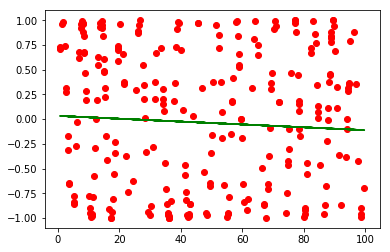

In [31]:
#plot del test contra la regresion que se predijo de train
plt.plot(X_test, Y_test, 'ro')
plt.plot(X_test, y, 'g-')
plt.show()

Se puede observar que este conjunto de datos no tiene comportamento lineal, de hecho parece tener forma de función sinusoidal.

In [32]:
#Este es el coeficiente que minimiza la funcion de error cuadrado medio
regressor3.coef_[0]

-0.0014450115061076384

In [33]:
#Fijamos el intercept a w0, este no lo variaremos por ahora.
w0 = regressor3.intercept_
w0

0.032844524138000902

Hacemos un sweep cambiando el coeficiente

In [34]:
w1arr = np.linspace(-10,10,len(Y_trainM))
len(X_trainM)

771

In [35]:
w1Error = []

for i in range(0,len(w1arr)):
    w1Error.append((calculateError(X_trainM,Y_trainM,w0,w1arr[i])))


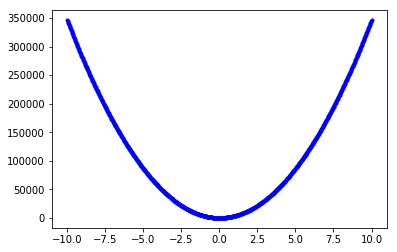

In [36]:
plt.plot(w1arr, w1Error, 'b.')
plt.show()

Podemos también calcular el error para el *intercept*. En este caso, fijemos w1 con el óptimo que la regresión de sklearn había calculado y cambiemos w0.

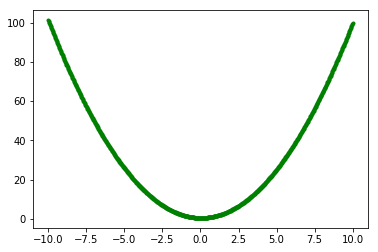

In [37]:
w1 = regressor3.coef_[0]
w0arr = np.linspace(-10,10,len(Y_trainM))

w0Error = []

for i in range(0,len(w0arr)):
    w0Error.append((calculateError(X_trainM,Y_trainM,w0arr[i],w1)))

    
plt.plot(w0arr, w0Error, 'g.')
plt.show()

Por supuesto que se puede hacer las dos optimizaciones al mismo tiempo (y esto es realmente lo que hace la biblioteca de sklearn o cualquier regresión lineal).

In [38]:
#Use less points so this doesn't take ages...

w0arr = np.linspace(-10,10,30)
w1arr = np.linspace(-10,10,30)

bothError = []
for i in range(0,len(w0arr)):
    bothError.append([])
    for j in range(0,len(w1arr)):
        bothError[i].append((calculateError(X_trainM,Y_trainM,w0arr[i],w1arr[j])))

Hacemos el plot.

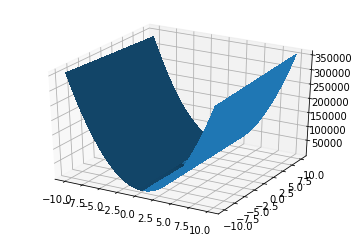

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(w0arr, w1arr)

ax.plot_surface(X, Y,bothError,rstride=1, cstride=1,linewidth=0, antialiased=False)
plt.show()

## Conclusiones

La regresión lineal es un tipo de regresión (y por lo tanto una técnica de aprendizaje de máquina supervisada de tipo regresión) simple en esencia, pero poderoso para varias aplicaciones pues como su función de costo (cual queremos minimizar) es el error cuadrado medio y esta es una función monomodal y convexa por su naturaleza, se puede minimizar fácilmente.

Los dos últimos modelos son un buen ejemplo de por qué la regresión lineal no sirve para todos los casos, pues es evidente que no todos los datasets se comportan de manera lineal y que por lo tanto una regresión lineal no es un buen modelo para predecir información sobre ellos. Una técnica que se puede utilizar en caso de que se conozca la forma de la función que se aproxima a los datos es hacer una transformación de los datos para que tengan un comportamiento lineal y sobre estos datos ya transformados correr una regresión lineal. Cualquier dato que el modelo prediga puede entonces ser transformado con la inversa de la transformación original y entonces sí ser atinado.

### Ejemplito de las transformaciones

Experimentemos con el segundo set de datos, parece que tienen un comportamiento cuadrático

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(df2[df2.columns[0:-1]],df2[df2.columns[-1]], train_size=0.75)

In [49]:
X_trainM = X_train.as_matrix()
Y_trainM = Y_train.as_matrix()

X_testM = X_test.as_matrix()
Y_testM = Y_test.as_matrix()

Hagamos una transformacion de raiz cuadrada a los datos y veamos cómo se comportan.

In [51]:
Y_trainMSR = np.sqrt(Y_trainM)
Y_testMSR = np.sqrt(Y_testM)

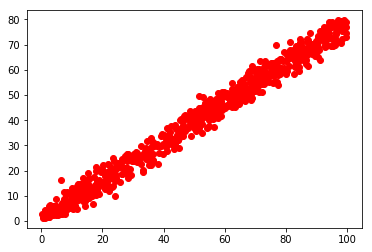

In [43]:
plt.plot(X_trainM, Y_trainMSR, 'ro')
plt.show()

En efecto ahora parece tener un comportamiento lineal. Podemos proceder a hacer una regresión lineal.

In [44]:
regressor4 = LinearRegression(copy_X = True, fit_intercept = True, n_jobs=1, normalize= False)
regressor4.fit(X_trainM, Y_trainMSR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
#Aqui predecimos con el mismo train para obtener la recta ya optimizada
y = regressor4.predict(X_trainM)

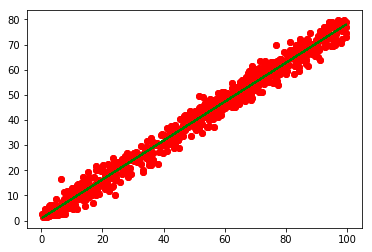

In [48]:
plt.plot(X_trainM, Y_trainMSR, 'ro')
plt.plot(X_trainM,y,'g-')
plt.show()

Ahora veamos cómo predice el modelo contra los datos que nunca ha visto, primero de manera transformada y luego regresando a los datos originales pero transformando inversamente los que predice.

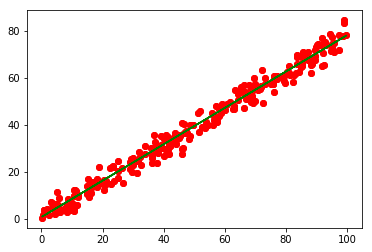

In [53]:
yPred = regressor4.predict(X_testM)

plt.plot(X_testM, Y_testMSR, 'ro')
plt.plot(X_testM,yPred,'g-')
plt.show()

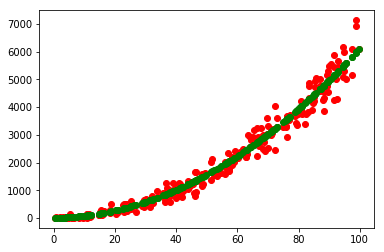

In [55]:
plt.plot(X_testM, np.power(Y_testMSR,2), 'ro')
plt.plot(X_testM,np.power(yPred,2),'go')
plt.show()

Evidentemente si se calcula el error cuadrado medio para esta forma, será mucho más bajo que si no se hubiera hecho ninguna transformación.